In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle, yaml
from pathlib import Path

In [2]:
k = 1.2
plt.rcParams["figure.figsize"] = [k * 6.4, k * 4.8]

In [20]:
from phystem.systems.ring.quantities.datas import DeltaData

def get_delta_configs(configs):
    return configs["run_cfg"].func_cfg["delta"]

def init_graph(id, data: DeltaData):
    xlims = get_delta_configs(data.configs)["xlims"]
    space_cfg = data.configs["space_cfg"]

    plt.title(f"{id} | t={data.init_times[id]:.3f}")

    h = space_cfg.height
    plt.plot(2*[xlims[0]], [-h/2, h/2], color="black")
    plt.plot(2*[xlims[1]], [-h/2, h/2], color="black")

    selected_mask = np.isin(data.init_uids[id], data.init_selected_uids[id])

    x, y = data.init_cms[id].T
    xs, ys = data.init_cms[id][selected_mask].T

    plt.scatter(x, y)
    plt.scatter(xs, ys, color="red")

    for i, uid in enumerate(data.init_uids[id]):
        plt.annotate(str(uid), (x[i], y[i]))

def final_graph(id, data: DeltaData):
    wait_dist = get_delta_configs(data.configs)["wait_dist"]
    for uid, cms in data.final_cms[id].items():
        plt.figure()
        plt.title(f"{uid} | t = {data.final_times[id][uid]:.3f}")
        
        init_idx = np.where(data.init_uids[id] == uid)[0][0]
        x_end = data.init_cms[id][init_idx][0] + wait_dist
        space_cfg = data.configs["space_cfg"]
        h = space_cfg.height
        plt.plot(2*[x_end], [-h/2, h/2], color="black")

        x, y = cms.T
        plt.scatter(x, y)
        
        selected_idx = np.where(data.final_uids[id][uid] == uid)[0][0]
        xs, ys = cms[selected_idx]
        plt.scatter(xs, ys, color="red")

        for i, uid in enumerate(data.final_uids[id][uid]):
            plt.annotate(str(uid), (x[i], y[i]))
    
def check_selected_uids(data: DeltaData):
    print(data.num_points)
    for id in range(data.num_points):
        expected = sorted(data.init_selected_uids[id])
        

        f_cms = sorted(data.final_cms[id].keys())
        if f_cms != expected:
            print("========")
            print(f"Error: final cm | id={id}")
            print("init:", expected)
            print("final:", f_cms)

        f_uids = sorted(data.final_uids[id].keys())
        if f_uids != expected:
            print("========")
            print(f"Error: final uids | id={id}")
            print("init:", expected)
            print("final:", f_uids)

def check_uids(data: DeltaData):
    for i in range(data.num_points):
        expected = data.init_uids[i]

        for uid, final_uids in data.final_uids[i].items():
            if (final_uids != expected).any():
                print(f"Erro: id={i} | uid={uid}")

In [25]:
data = DeltaData("datas/all/delta")

In [27]:
check_selected_uids(data)
# check_uids(data)

24
Error: final cm | id=16
init: [74, 77, 78, 80]
final: [74, 78, 80]
Error: final uids | id=16
init: [74, 77, 78, 80]
final: [74, 78, 80]
Error: final cm | id=17
init: [79, 81, 82, 83]
final: [79, 82, 83]
Error: final uids | id=17
init: [79, 81, 82, 83]
final: [79, 82, 83]
Error: final cm | id=18
init: [84, 85, 86, 87]
final: [85]
Error: final uids | id=18
init: [84, 85, 86, 87]
final: [85]
Error: final cm | id=19
init: [88, 89, 90]
final: []
Error: final uids | id=19
init: [88, 89, 90]
final: []
Error: final cm | id=20
init: [91, 92, 93]
final: []
Error: final uids | id=20
init: [91, 92, 93]
final: []
Error: final cm | id=21
init: [94, 95, 96, 98]
final: []
Error: final uids | id=21
init: [94, 95, 96, 98]
final: []
Error: final cm | id=22
init: [97, 99, 101]
final: []
Error: final uids | id=22
init: [97, 99, 101]
final: []
Error: final cm | id=23
init: [100, 102, 104]
final: []
Error: final uids | id=23
init: [100, 102, 104]
final: []


In [23]:
print(data.init_selected_uids[3])
print(data.init_uids[3])
print(data.final_uids[3][16])

[15 16 17 18]
[ 3  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[ 3 73 69 72  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


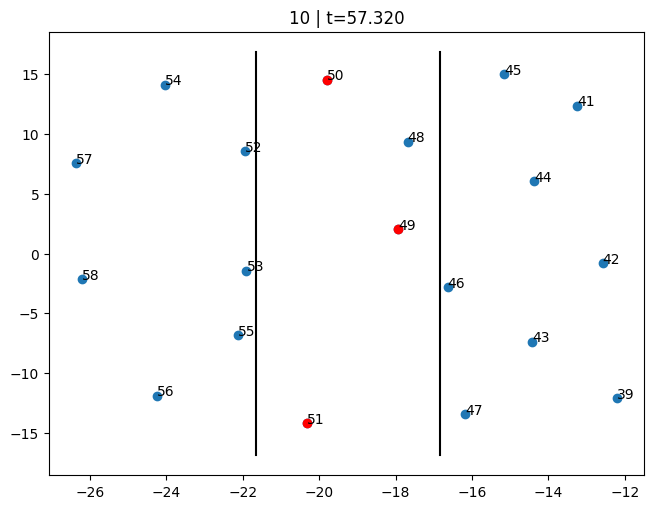

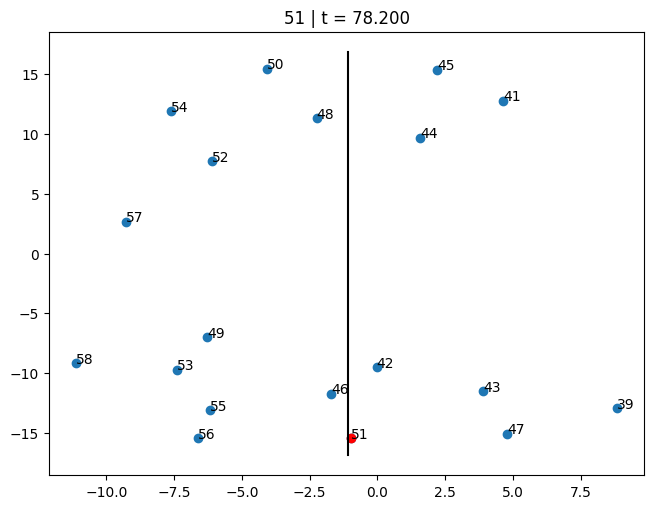

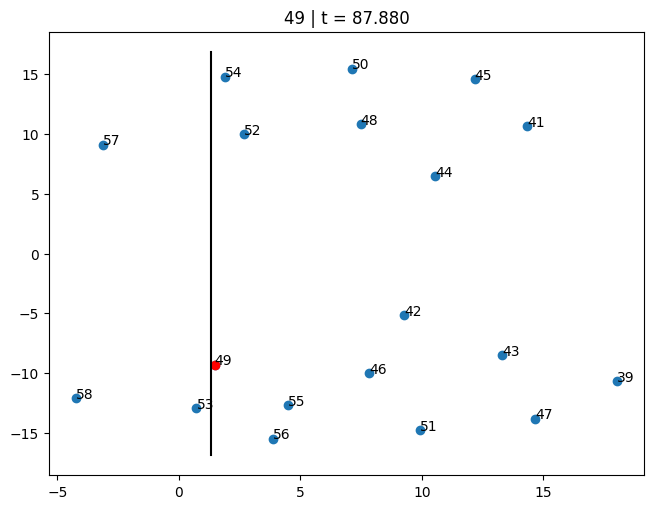

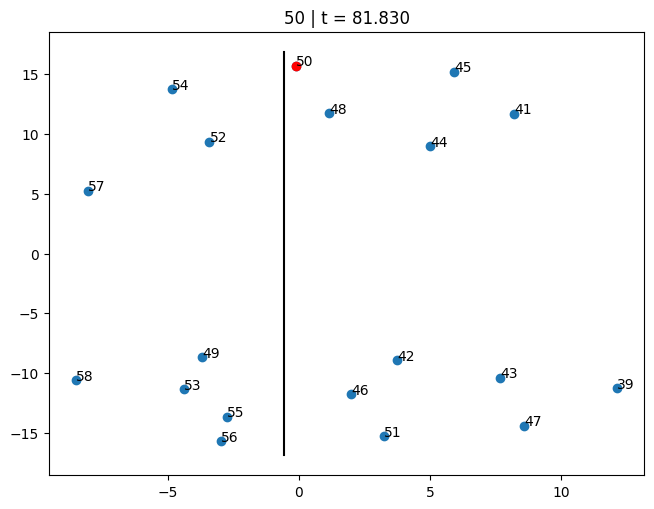

In [29]:
id = 10

init_graph(id, data)
final_graph(id, data)

# for i in range(data.num_points):
#     plt.figure()
#     init_graph(i, data)